## The Titanic Project

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data_dir = "Titanic Data"

In [35]:
train_df = pd.read_csv(os.path.join(data_dir, "train.csv"))
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test_df = pd.read_csv(os.path.join(data_dir, "test.csv"))
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Primary data analysis


In [37]:
print(f"train dataset shape: {train_df.shape}")
print(f"test dataset shape : {test_df.shape}")

train dataset shape: (891, 12)
test dataset shape : (418, 11)


<br>The gender sumbission file contains only two column features.<br>
A closer look at the columns, it contains the <strong>survival status of the passengers</strong> i.e survived or passed away.<br>
It is also a subset of the <strong>test dataset</strong>.<br>
<br>
This implies that we will use it to evaluate our model accuracy


In [38]:
# Check description of both train and testing datasets

print("Training dataset description information")
display(train_df.describe(include = ['O'])) #this will get information on the object columns
display(train_df.describe())
print("*"*100)
print("Testing dataset decribe information")
display(test_df.describe(include= ['O']))
display(test_df.describe())

Training dataset description information


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ayoub, Miss. Banoura",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


****************************************************************************************************
Testing dataset decribe information


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Keeping, Mr. Edwin",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<h5>Quick Insights</h5>

We can already tell that there are <strong> missing values</strong> in both datasets <br>
However, lets see their count in a more explanatory way

In [39]:
# Number of null values for each column in train and test dataset 

print("Training data missing values")
display(train_df.isnull().sum())
print("*"*100)
print("Testing data missing values")
display(test_df.isnull().sum())

Training data missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

****************************************************************************************************
Testing data missing values


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Missing Values insights
In the <strong>train data</strong> columns with missing values are:
<ul>
    <li> Age : 177 values</li>
    <li> Cabin : 678 Values</li>
    <li> Embarked : 2 Values</li>
   </ul>
In the <strong>test data</strong> columns with missing values are:
<ul>
    <li> Age : 86 values</li>
    <li> Cabin : 327 Values</li>
</ul>

In [40]:
# Checking for any duplicate rows


The <strong>Cabin column</strong> has a lot of missing values which means it can not be an influential feature in training the model.<br>
Therefore the best option is to drop it

In [41]:
# Dropping the Cabin Colunm

train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

### Exploratory Data Analysis (EDA)
EDA is carrying out an indepth analysis of the data so as to discover hidden patterns, data anormalies, and test hypothesis/assumptions<br>
We will use statistical methods and visuals(graphical) 

We neeed to <strong>drop</strong> some columns as we do not need them.
<ul>
    <li>For the <strong>categorical</strong> data we need to drop the following columns</li>
    <ol>
        <li>Name</li>
        <li>Ticket</li>
    </ol>
    <li>For the <strong>numerical</strong> data we need to drop the following columns</li>
    <ol>
        <li>PassengerId</li>
        <li>Survived</li>
    </ol>
</ul> 

In [42]:
#  Dropping hte columns
cat_df = train_df[["Sex", "Pclass", "Embarked", "Parch","SibSp"]]
num_df = train_df[["Age", "Fare", "Parch","SibSp"]]

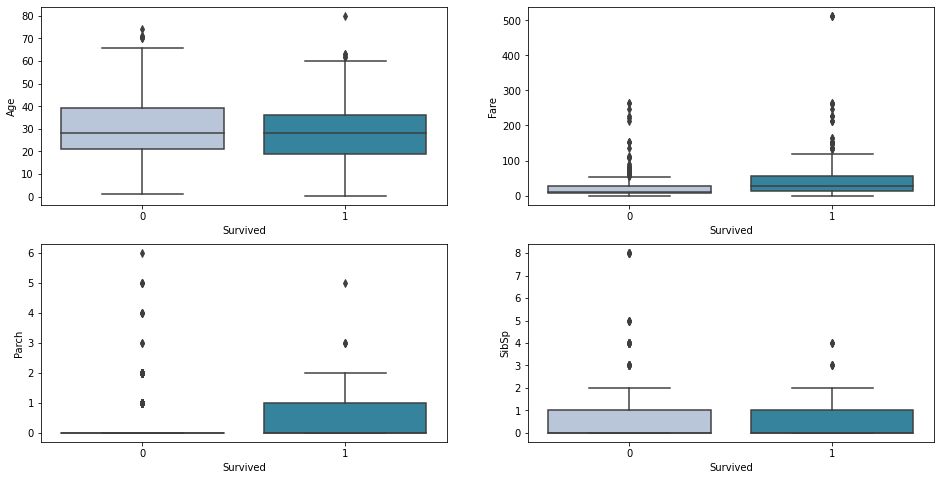

In [43]:
# plot numerical data

fig = plt.figure(figsize = (16,8))

for i in range(len(num_df.columns)):
    column = num_df.columns[i]
    sub = fig.add_subplot(2,2,i+1)
    chart = sns.boxplot(data = train_df, y = column, x = 'Survived', palette = 'PuBuGn')

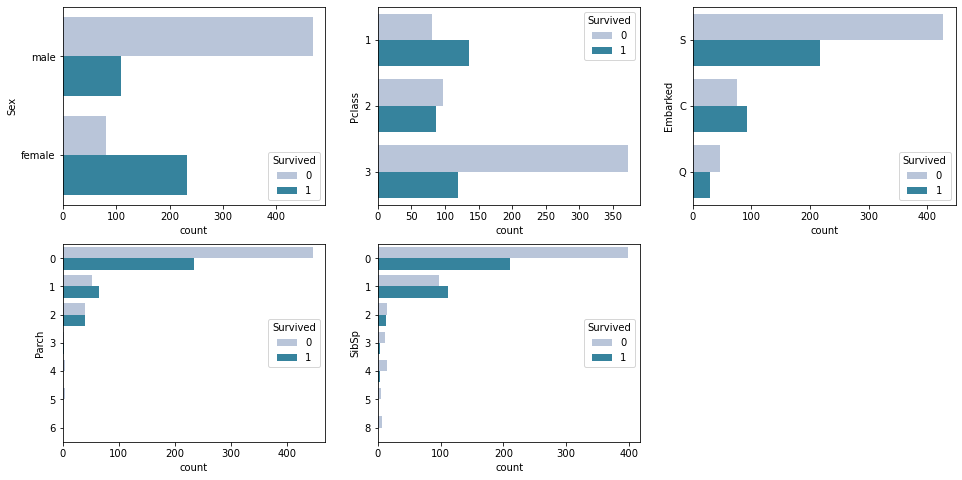

In [44]:
# plot categorical data

fig = plt.figure(figsize = (16,8))

for i in range(len(cat_df.columns)):
    column = cat_df.columns[i]
    sub = fig.add_subplot(2,3,i+1)
    chart = sns.countplot(data = train_df, hue = 'Survived', y = column, palette = 'PuBuGn')

In [45]:
# gender difference on board the titanic
males_on_board = train_df.loc[train_df.Sex == 'male']
percentage_males = (len(males_on_board)/train_df.shape[0])*100
print(f"Number of males on board = {len(males_on_board)} which is {round(percentage_males, 2)}%")

females_on_board = train_df.loc[train_df.Sex == 'female']
percentage_females = (len(females_on_board)/train_df.shape[0])*100
print(f"Number of females on board = {len(females_on_board)} which is {round(percentage_females, 2)}%\n\n")

# Get survival rate for both females and male
male_survival = males_on_board.loc[males_on_board.Survived == 1]
print(f"% of male survival: {len(male_survival)/males_on_board.shape[0]*100} %")

female_survival = females_on_board.loc[females_on_board.Survived == 1]
print(f"% of female survival: {len(female_survival)/females_on_board.shape[0]*100} %\n")


Number of males on board = 577 which is 64.76%
Number of females on board = 314 which is 35.24%


% of male survival: 18.890814558058924 %
% of female survival: 74.20382165605095 %



<AxesSubplot:title={'center':'Survival distribution of diffrent ages'}, xlabel='Age', ylabel='Count'>

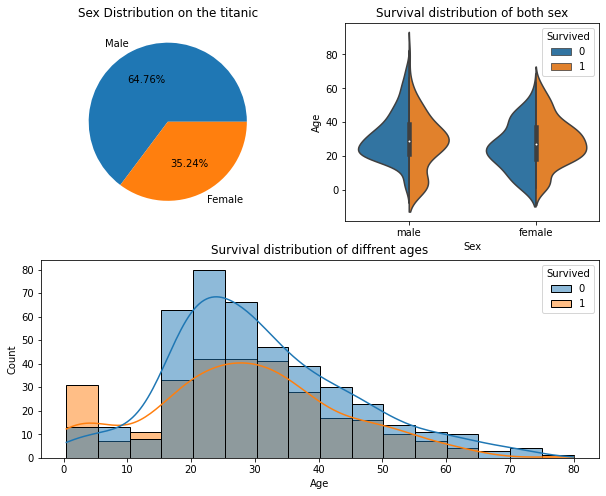

In [46]:
# plot sex distribution on board

fig = plt.figure(figsize = (10,8))

fig.add_subplot(221)
plt.title('Sex Distribution on the titanic')
plt.pie(data = train_df["Sex"], x = train_df.Sex.value_counts(), 
        labels = ['Male','Female'], autopct = '%.2f%%')


fig.add_subplot(222)
plt.title("Survival distribution of both sex")
sns.violinplot(data = train_df, x=train_df["Sex"],
           y = train_df['Age'], hue = train_df["Survived"],
              split=True)


fig.add_subplot(212)
plt.title("Survival distribution of diffrent ages")
sns.histplot(data = train_df, x=train_df["Age"],
           kde = True, hue = train_df["Survived"],
              bins = 16, stat = 'count')

#### Survival distribution of both males and females

<AxesSubplot:title={'center':'Survival rates for females'}, xlabel='Age', ylabel='Count'>

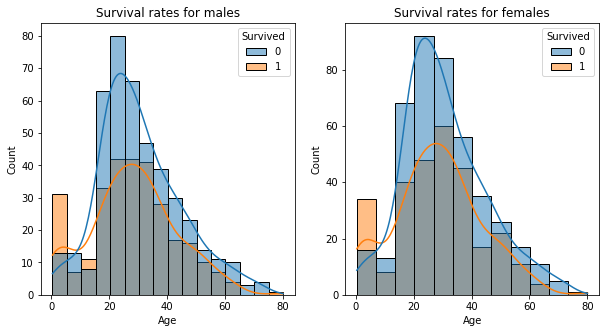

In [47]:
fig = plt.figure(figsize = (10,5))

# Survival rates for males
fig.add_subplot(121)
plt.title("Survival rates for males")
sns.histplot(data = train_df[train_df["Sex"] == "male"], 
            x = train_df["Age"], hue = train_df['Survived'], kde = True,
            bins = 16, stat = 'count')

# Survival rates for females
fig.add_subplot(122)
plt.title("Survival rates for females")
sns.histplot(data = train_df[train_df["Sex"] == "female"], 
            x = train_df["Age"], hue = train_df['Survived'],
            kde = True, bins = 12, stat = 'count')


## processing text data

In [48]:
display(train_df[['Name','Ticket']].head())

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450


We can tell that a passangers tittle is oncluded in the Name.<br>
we need to extract the titles<br>
Later, we will need to drop the ticket as we don't have any meanngfll information we can get from it

### Extract title from name

In [49]:
# We will extract titles from both train and testing
import re

train_df['Title'] = train_df['Name'].str.extract(r'([A-Za-z]+)\.')
test_df['Title'] = test_df['Name'].str.extract(r'([A-Za-z]+)\.')

print("Titles in train data/n")
display(train_df.Title.value_counts())
print('Titles in the test data')
display(test_df.Title.value_counts())
print('*'*100)

# Check missing title values
print('Missing Title values in train data')
display(train_df.Title.isnull().value_counts())

print('Missing Title values in test data')
display(test_df.Title.isnull().value_counts())


Titles in train data/n


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Lady          1
Mme           1
Jonkheer      1
Don           1
Capt          1
Countess      1
Ms            1
Name: Title, dtype: int64

Titles in the test data


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

****************************************************************************************************
Missing Title values in train data


False    891
Name: Title, dtype: int64

Missing Title values in test data


False    418
Name: Title, dtype: int64

All passangers had a title and as shown, no missing values in the titles<br><br>
We want to clean the titles so that we can have the fillowing categories:
<ul>
<li>Mr.</li>
<li>Mrs.</li>
<li>Miss.</li>
<li>Other.</li>
</ul>


In [50]:
# train data titles
for data in [train_df]:
    data['Title'] = data['Title'].replace(['Mr', 'Master', 'Capt', 'Sir', 'Don'], 'Mr')
    data['Title'] = data['Title'].replace(['Mrs', 'Countess', 'Lady'], 'Mrs')
    data['Title'] = data['Title'].replace(['Miss', 'Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Mme', 'Col', 'Dona','Jonkheer', 'Major'], 'Other')

print('New titles for passangers onboard --train data')
display(train_df['Title'].value_counts())

New titles for passangers onboard --train data


Mr       560
Miss     185
Mrs      127
Other     19
Name: Title, dtype: int64

In [51]:
# test data titles
for data in [test_df]:
    data['Title'] = data['Title'].replace(['Mr', 'Master', 'Capt', 'Sir', 'Don'], 'Mr')
    data['Title'] = data['Title'].replace(['Mrs', 'Countess', 'Lady'], 'Mrs')
    data['Title'] = data['Title'].replace(['Miss', 'Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Mme', 'Col', 'Dona','Jonkheer', 'Major'], 'Other')

print('New titles for passangers onboard --test data')
display(test_df['Title'].value_counts())

New titles for passangers onboard --test data


Mr       261
Miss      79
Mrs       72
Other      6
Name: Title, dtype: int64